In [62]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("data.csv")
headings=list(data.columns)
for i in headings:
  data[i]=[x.strip() if isinstance(x, str) else x for x in data[i]]

# Reasons for Leaving

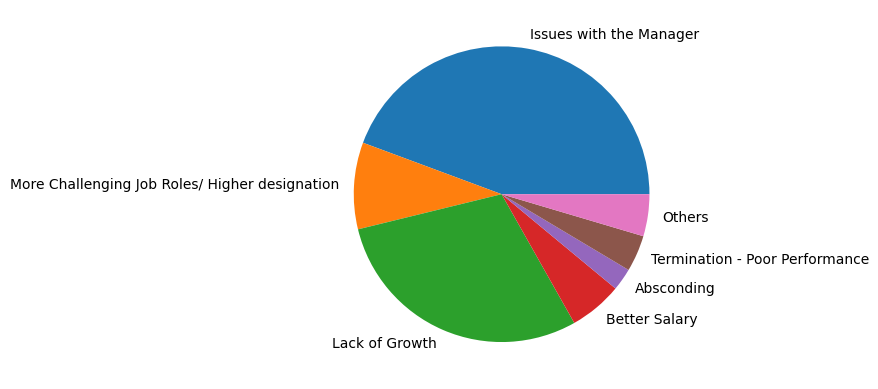

In [63]:
remarkscount={"Issues with the Manager":0, "More Challenging Job Roles/ Higher designation": 0, "Lack of Growth" : 0,"Better Salary" : 0, "Absconding":0, "Termination - Poor Performance": 0, "Others":0}
for i in data.index:
    remark=data["Remarks"][i]
    if remark in remarkscount:
        remarkscount[data["Remarks"][i]]+=1
    else:
        remarkscount["Others"]+=1
plot=plt.pie(remarkscount.values(), labels=remarkscount.keys())
    

- We can see that a majority of the employees left due to issues with the manager, with the next most common reason being lack of growth at the company, followed by more challenging roles/higher designations.
- This implies that a change of management may be necessary, and the company may need to work on rewarding employees/giving them a greater incentive to stay

### Designation-wise split:

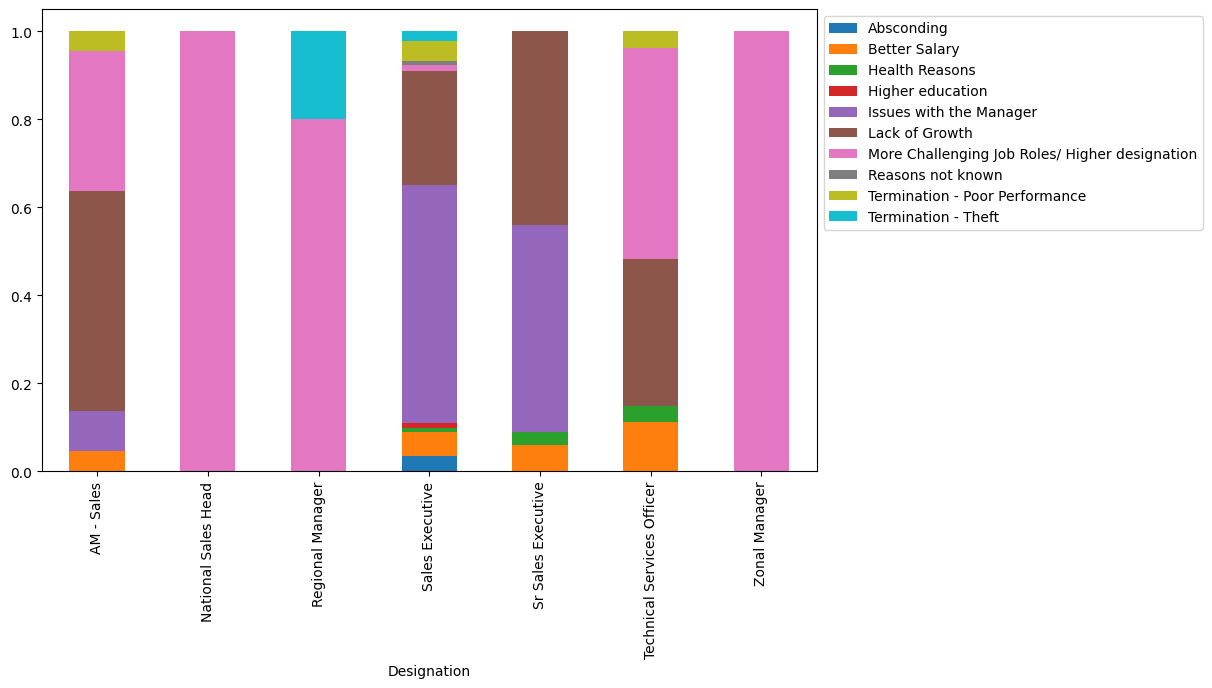

In [64]:
grouped = data.groupby(['Designation', 'Remarks']).size().unstack(fill_value=0)
total = grouped.sum(axis=1)
proportions = grouped.divide(total, axis=0)
fig, ax = plt.subplots(figsize=(10, 6))

proportions.plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

We can see that 
 

*   A majority of the people in higher roles (National Sales Head, Regional Manager, Zonal Manager) left because of more challenging job roles/higher designations
*   Some of those in intermediate positions (AM, Technical Services Officer) had the same remarks, while the rest mostly left due to lack of growth


*   Most (Sr) Sales Executives that left had issues with the manager, with a few leaving due to lack of growth





### Zone-wise Designation vs Remarks

['West' 'South' 'Central' 'North' 'East' 'Ho']


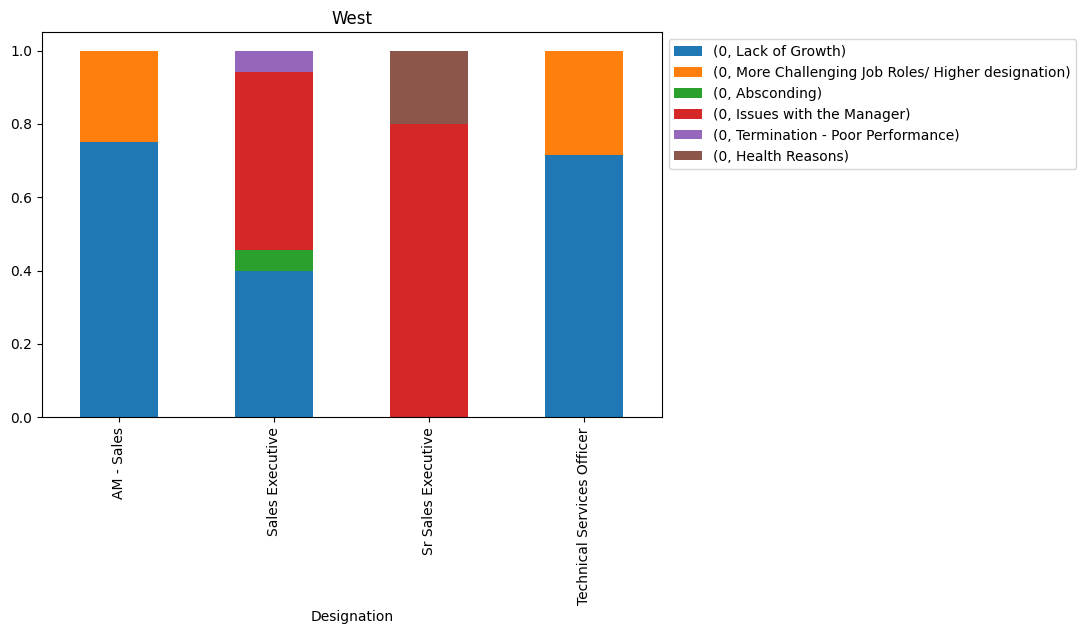

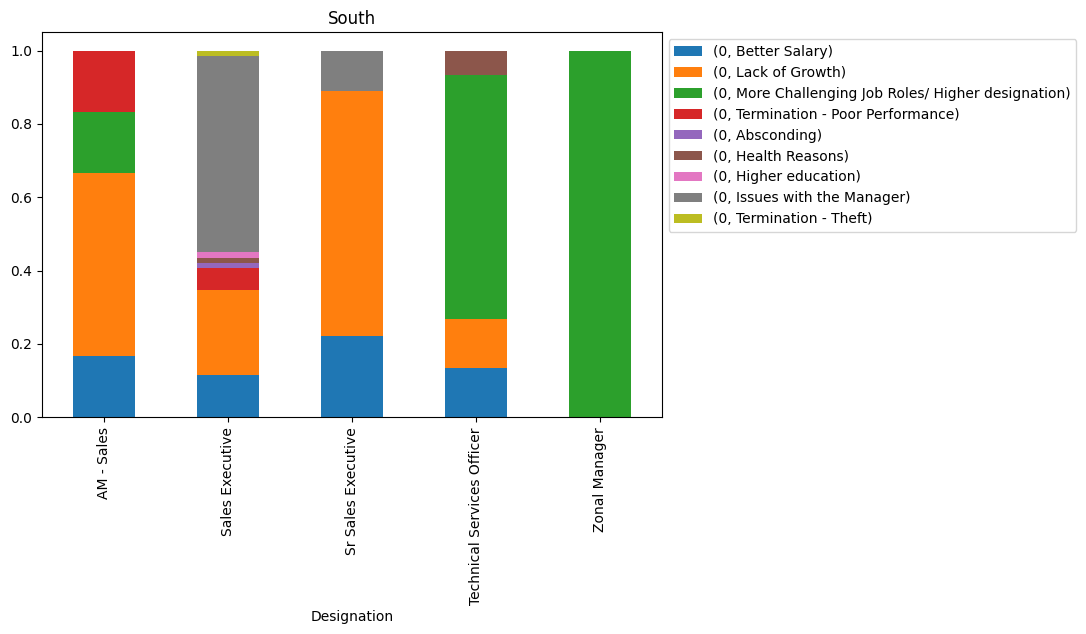

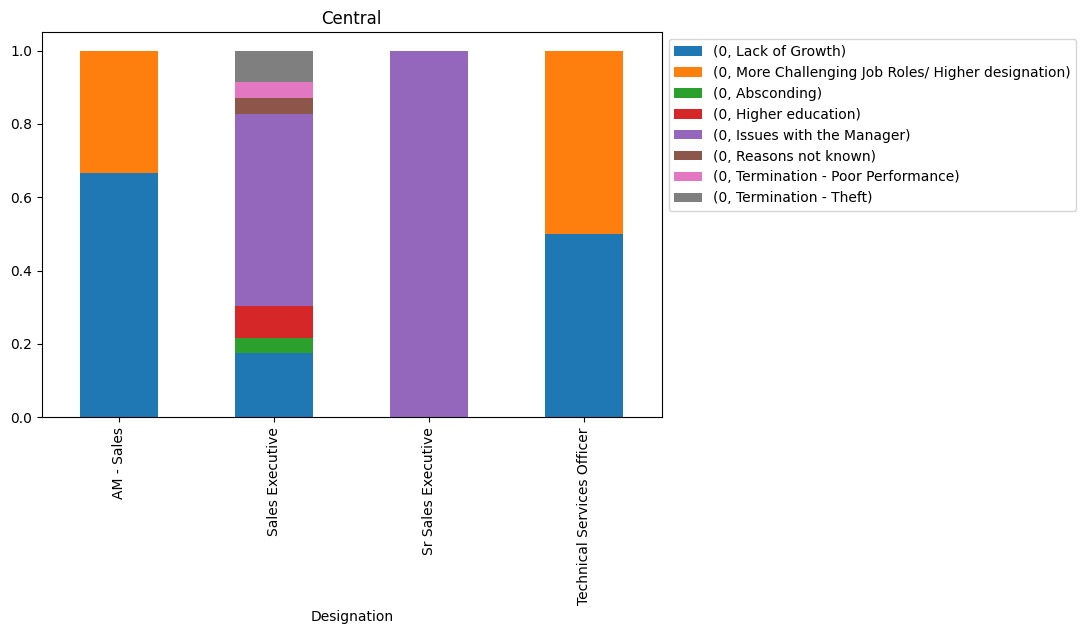

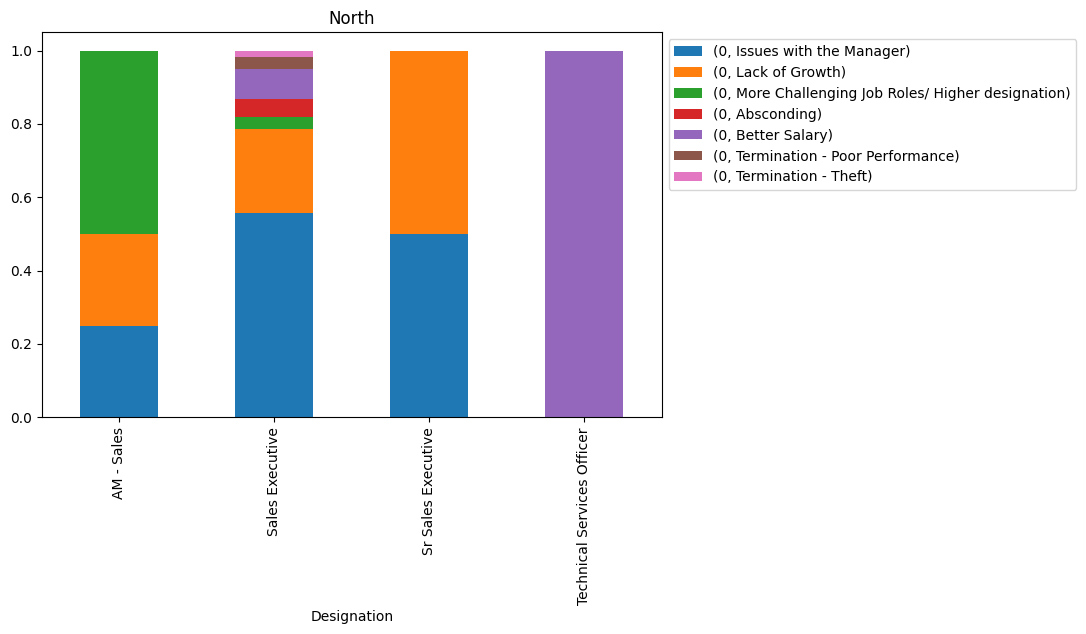

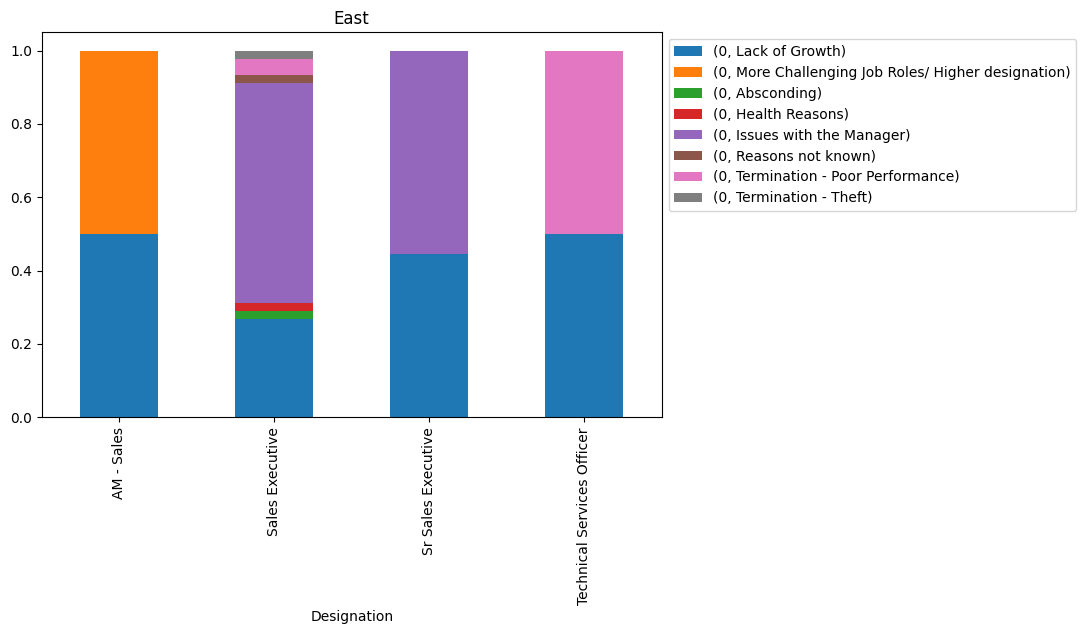

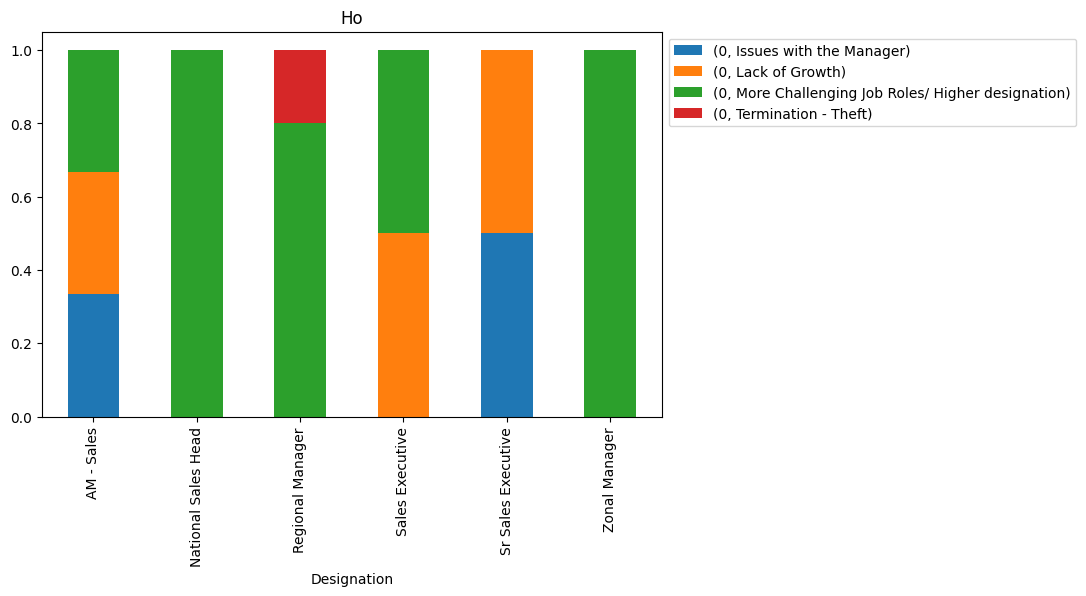

In [65]:
data['Zone']=[x.title() for x in data['Zone']]
grouped = data.groupby(['Zone', 'Designation', 'Remarks']).size()
zones=data['Zone'].unique()
print(zones)
#fig, axs = plt.subplots(3, 2, figsize=(10, 6))

for i in range(len(zones)):
  z_remarks=grouped[zones[i]].to_frame().unstack()
  total = z_remarks.sum(axis=1)
  proportions = z_remarks.divide(total, axis=0)
  fig, ax = plt.subplots(figsize=(8, 5))
  
  proportions.plot(kind='bar', stacked=True, ax=ax, title=zones[i])
  ax.legend(bbox_to_anchor=(1,1))
  

The zone-wise plots can give us better insights as to why employees chose to leave (eg. if many employees from a certain zone left due to issues with the manager, that could mean that the manager is the issue)

- One useful insight is that most of the people who left because of better salary are from the south zone, everything else is more or less uniform, excluding HO

# Monthly Income vs Designation & Gender:

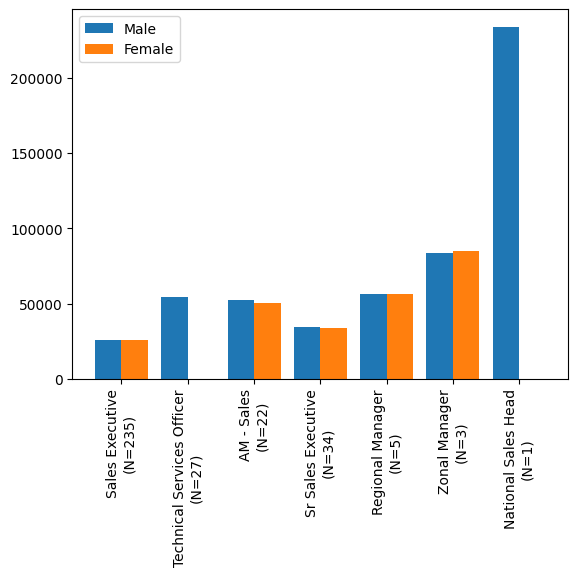

In [66]:
grouped=data.groupby(['Designation', 'Gender'])["Monthly Income"].apply(list)
y1=[]
y2=[]
headings=data["Designation"].unique()
for i in headings:
  if "Male" in grouped[i]:
    y1.append(sum(grouped[i]["Male"])/len(grouped[i]["Male"]))
  else:
    y1.append(0)
  if "Female" in grouped[i]:
    y2.append(sum(grouped[i]["Female"])/len(grouped[i]["Female"]))
  else:
    y2.append(0)
x=list(range(1,len(data["Designation"].unique())+1))
width=0.4
plt.bar([a-width/2 for a in x], y1, width)
plt.bar([a+width/2 for a in x], y2, width)
counts=data.groupby(["Designation"]).count()["S.No"].to_dict()
plt.xticks(range(1,len(data["Designation"].unique())+1), ["{}\n(N={})".format(a,str(counts[a])) for a in headings],rotation=90)
#plt.xlabel(data["Designation"].unique(), rotation=90)
plt.legend(["Male", "Female"])
plt.show()



*   Those in managerial roles and TSOs have a higher pay, the order being National Sales Head > Zonal Manager > Regional Manager > AM Sales ~= TSO > Sr Sales Exec > Sales Exec (which makes sense logically) 
*   We can also see that there is no pay gap between males and females in this case!





# Percentage of people with Bachelors/MBAs in each designation

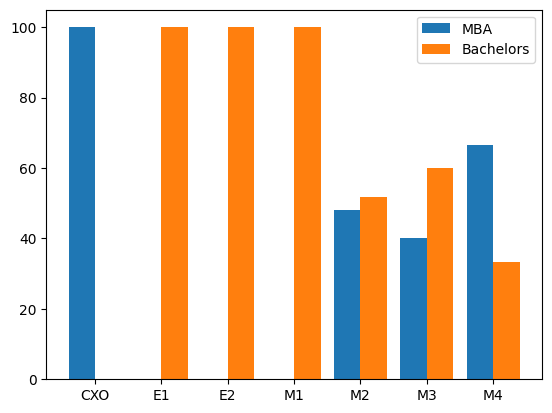

In [67]:
grouped=data.groupby(['Grade', 'Education']).count()["S.No"].unstack(fill_value=0)
x=list(range(1,len(data["Grade"].unique())+1))
grades=list(grouped.index)
vals=grouped.values
mba=[]
bachelors=[]
for i in range(len(grades)):
    total=sum(vals[i])
    bachelors.append(vals[i][0]/total*100)
    mba.append(vals[i][1]/total*100)
width=0.4
plt.bar([a-width/2 for a in x], mba, width)
plt.bar([a+width/2 for a in x], bachelors, width)
plt.xticks(range(1,len(data["Designation"].unique())+1), grades)
plt.legend(["MBA", "Bachelors"])
plt.show()

People with MBAs only fill up the higher grades (M2, M3, M4, CXO), but even in those positions, there are still people with bachelors degrees (other than CXO). We can see that managerial expertise is favoured, but not necessary, in order to land a higher role.